# HW1: Linear Regression Example (工作經驗到底付多少薪水)

# Step1: Import Data and Observe Data

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("train.csv")
'''
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None, sep='\s+')
'''
print(data.head())
type(data)
print(data.head())
print(data.info())
len(data)
print(data.describe())
print(data.columns)

    x      y
0  73   7655
1  20   2495
2  99  10482
3  38   4807
4  26   2649
    x      y
0  73   7655
1  20   2495
2  99  10482
3  38   4807
4  26   2649
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
x    100 non-null int64
y    100 non-null int64
dtypes: int64(2)
memory usage: 1.6 KB
None
                x             y
count  100.000000    100.000000
mean    52.670000   5820.040000
std     28.039674   2809.340844
min      2.000000    949.000000
25%     31.000000   3467.000000
50%     52.500000   5949.500000
75%     74.000000   7974.250000
max    102.000000  11014.000000
Index(['x', 'y'], dtype='object')


0      73
1      20
2      99
3      38
4      26
5      31
6       2
7      45
8      81
9      39
10     28
11     12
12     56
13     70
14     19
15     18
16     70
17     70
18     64
19     38
20     40
21     98
22     48
23     78
24     22
25     53
26     48
27     54
28     50
29     33
     ... 
70     63
71     21
72     66
73     11
74     73
75     97
76     62
77     89
78     12
79      9
80     59
81    101
82     27
83     69
84     37
85     87
86     81
87     78
88      4
89     23
90     64
91     90
92     92
93     31
94     10
95     22
96     87
97     68
98     28
99     44
Name: x, Length: 100, dtype: int64
0      7655
1      2495
2     10482
3      4807
4      2649
5      3885
6      1207
7      4650
8      8681
9      4255
10     2993
11     2023
12     6478
13     7662
14     2138
15     2655
16     7805
17     7081
18     6976
19     4378
20     4887
21    10819
22     5400
23     8053
24     2238
25     6140
26     5811
27     6118
28     5813
29     

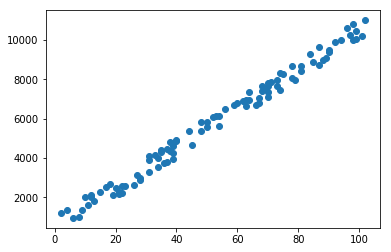

In [86]:
x=data.x
y =data.y
print(x)
print(y)
plt.scatter(x,y)

In [87]:
print(x)
print(type(x))
len(x)

0      73
1      20
2      99
3      38
4      26
5      31
6       2
7      45
8      81
9      39
10     28
11     12
12     56
13     70
14     19
15     18
16     70
17     70
18     64
19     38
20     40
21     98
22     48
23     78
24     22
25     53
26     48
27     54
28     50
29     33
     ... 
70     63
71     21
72     66
73     11
74     73
75     97
76     62
77     89
78     12
79      9
80     59
81    101
82     27
83     69
84     37
85     87
86     81
87     78
88      4
89     23
90     64
91     90
92     92
93     31
94     10
95     22
96     87
97     68
98     28
99     44
Name: x, Length: 100, dtype: int64
<class 'pandas.core.series.Series'>


100

# Step2: Feture Engineering (Data PreProcessing=data missing, outlier, normalization, find efficient features, split training and validation set, test set )

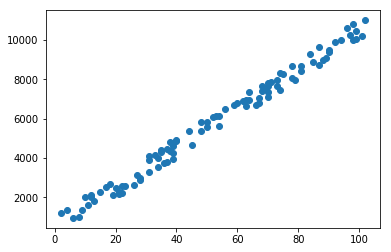

In [88]:
plt.scatter(x,y)

          x         y
x  1.000000  0.993691
y  0.993691  1.000000


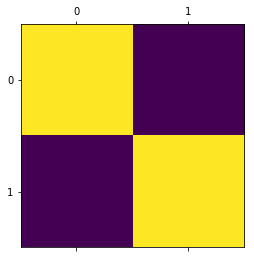

In [89]:
print(data.corr())
plt.matshow(data.corr())
plt.show()

## Step2.1 Prepare x, y fetures and labels for sklearn

In [90]:

x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

print(type(x))
print(x.shape)
print(type(y))
print(y.shape)


<class 'numpy.ndarray'>
(100, 1)
<class 'numpy.ndarray'>
(100, 1)


# Step 3: Build Prediction Model

In [91]:
from sklearn.linear_model import LinearRegression as LR
model = LR()
model.fit(x,y)
pre = model.predict(x)

'''
print(model)
a=model.intercept_
b=model.coef_
'''

'\nprint(model)\na=model.intercept_\nb=model.coef_\n'

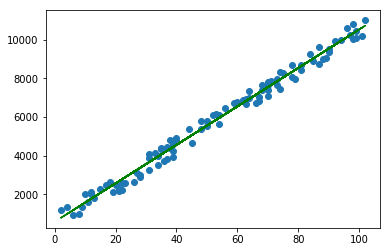

In [92]:
plt.scatter(x,y)
plt.plot(x,pre,'g-')
plt.savefig('linearRegression')

# Step 4: Performance Evaluation

In [93]:
model.score(x,y)


0.9874218063980245

# Step 5  write back to file

In [94]:
from pandas import Series,DataFrame

pre=pd.DataFrame(pre)
data['pre']=pre
iid =list(range(1,len(pre)+1))
data['myid']=DataFrame(iid)

type(pre)
print(pre[:10])
data

              0
0   7844.085190
1   2567.430242
2  10432.632901
3   4359.501734
4   3164.787406
5   3662.585043
6    775.358751
7   5056.418425
8   8640.561409
9   4459.061262


,x,y,pre,myid
0,73,7655,7844.085190,1
1,20,2495,2567.430242,2
2,99,10482,10432.632901,3
3,38,4807,4359.501734,4
4,26,2649,3164.787406,5
5,31,3885,3662.585043,6
6,2,1207,775.358751,7
7,45,4650,5056.418425,8
8,81,8681,8640.561409,9
9,39,4255,4459.061262,10


In [96]:
data.to_csv('results1.csv')

In [97]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
data.to_sql('pm25sql', con=engine)
engine.execute("SELECT * FROM pm25sql").fetchall()
#[(0, 'User 1'), (1, 'User 2'), (2, 'User 3')]

[(0, 73, 7655, 7844.085190408411, 1),
 (1, 20, 2495, 2567.4302424671514, 2),
 (2, 99, 10482, 10432.632900719218, 3),
 (3, 38, 4807, 4359.501734220787, 4),
 (4, 26, 2649, 3164.78740638503, 5),
 (5, 31, 3885, 3662.585042983262, 6),
 (6, 2, 1207, 775.3587507135163, 7),
 (7, 45, 4650, 5056.4184254583115, 8),
 (8, 81, 8681, 8640.561408965583, 9),
 (9, 39, 4255, 4459.061261540433, 10),
 (10, 28, 2993, 3363.906461024323, 11),
 (11, 12, 2023, 1770.9540239099804, 12),
 (12, 56, 6478, 6151.573225974423, 13),
 (13, 70, 7662, 7545.406608449472, 14),
 (14, 19, 2138, 2467.8707151475055, 15),
 (15, 18, 2655, 2368.3111878278587, 16),
 (16, 70, 7805, 7545.406608449472, 17),
 (17, 70, 7081, 7545.406608449472, 18),
 (18, 64, 6976, 6948.0494445315935, 19),
 (19, 38, 4378, 4359.501734220787, 20),
 (20, 40, 4887, 4558.62078886008, 21),
 (21, 98, 10819, 10333.073373399573, 22),
 (22, 48, 5400, 5355.097007417251, 23),
 (23, 78, 8053, 8341.882827006644, 24),
 (24, 22, 2238, 2766.5492971064446, 25),
 (25, 53, 6

In [100]:
# 將 sql 通道打開
import sqlite3
conn = sqlite3.connect('lightdb.sqlite3')


data.to_sql('pm25', conn, if_exists='replace')
tempdata = pd.read_sql('select * from light', conn, index_col=['myid'])
tempdata.head()
conn.close()

'''
cursor = conn.cursor()
sqlcmd='select * from pm25'
cursor.execute(sqlcmd)
'''

DatabaseError: Execution failed on sql 'select * from light': no such table: light

<a id="p1"></a>
# 1. Importing Libraries and Packages
We will use these packages to help us manipulate the data and visualize the features/labels as well as measure how well our model performed. Numpy and Pandas are helpful for manipulating the dataframe and its columns and cells. We will use matplotlib along with Seaborn to visualize our data.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting data
import seaborn as sns # Advanced visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

<a id="p2"></a>
# 2. Loading and Viewing Data Set
With Pandas, we can load both the training and testing set that we wil later use to train and test our model. Before we begin, we should take a look at our data table to see the values that we'll be working with. We can use the head and describe function to look at some sample data and statistics.

In [ ]:
data = pd.read_csv('../input/linear-regression-dataset.csv')

In [ ]:
data

In [ ]:
data.info

In [ ]:
data.describe()

Showing first 5 column

In [ ]:
data.head(5)

Showing last five columns

In [ ]:
data.tail()

In [ ]:
data.corr()

<a id="p3"></a>
# 3. Plotting and Visualizing Data

Plotting the data with matplotlib scatter

In [ ]:
plt.scatter(data.experience, data.salary)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

Plotting data with subplot

In [ ]:
data_plot = data.loc[:,["experience","salary"]]
data_plot.plot()

In [ ]:
data.plot(kind = "hist",y = "experience",bins = 50,range= (0,50),normed = True)

> **Seaborn**

Heatmapping with Seaborn 

In [ ]:
f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

<a id="p4"></a>
# 4 Model Fitting, Optimizing, and Predicting
Now that our data has been processed and formmated properly, and that we understand the general data we're working with as well as the trends and associations, we can start to build our model. We can import different classifiers from sklearn. 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()
x = data.experience.values.reshape(-1,1)
y = data.salary.values.reshape(-1,1)

Fitting the data

In [ ]:
linear_reg.fit(x,y)

Predicting twenty years experience salary

In [ ]:
next_salary = linear_reg.predict([[20]])
print(next_salary)